Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0
Write down the names + student ID of the people in your group.

Sietse Molenaar, $11072628$

Loek Berkers, $11948302$

Dennis de Voogt, $10695141$

----
# Project keywords
Interpolation, least squares, optimization, nonlinear least squares

----
# Project description
In this assignment,  we will explore methods for data fitting and interpolation. Given a dataset of some quantity at different moments in time, such methods can be used to predict future values as well as to compute values at past times where we do not have observations.

Consider the following data set for Arctic sea ice minimum, an important climate signal. Arctic sea ice extent reaches a minimum every year in September. The data, obtained from NASA (see
https://climate.nasa.gov/vital-signs/arctic-sea-ice/), shows the minimum sea ice extent reached in different years. 
In the table, $t$ denotes the year, $s$ denotes the sea ice extent in million square kilometers.

The aim of this project is to explore various ways of fitting functions to this dataset, and see how well they perform and how robust they are.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

ice_times = np.array([1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2016], dtype=np.float64)
ice_areas = np.array([7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 5.31, 3.40, 4.59, 4.30], dtype=np.float64)

## Exercise 2
For constructing a polynomial interpolating function through the data, consider the following possible sets of basis functions: (a) the set $\phi_j(t)=t^{j-1}$ (these are the regular monomials), (b) the set $\phi_j(t)=(t-1978)^{j-1}$, (c) the set $\phi_j(t)=((t-1998)/18)^{j-1}$. The index $j$ runs from 1 to $J$.

What should be the value of $J$? For each of the sets of basis functions (a), (b), (c), compute the corresponding Vandermonde matrix. How do their condition numbers compare?

In [2]:
# Vandermonde matrices for polynomial 14
vander1 = np.vander(ice_times, 14)
vander2 = np.vander(ice_times - 1978, 14)
vander3 = np.vander((ice_times-1998)/18, 14)

print("Condition numbers for the corresponding Vandermonde matrices", "\n"
      , np.linalg.cond(vander1),"\n"
      , np.linalg.cond(vander2),"\n"
      , np.linalg.cond(vander3))


Condition numbers for the corresponding Vandermonde matrices 
 5.729006870130602e+59 
 5.006985289782146e+23 
 225102.97749679844


$J = 14$, the amount datapoints.




## Exercise 3
Use the set of basis functions with the best conditioning and compute the interpolating function through the data in the table above. Show the coefficients of the interpolating function in a table. Plot the data points and the interpolating function in a single figure. Discuss the results.

What values does this interpolating function predict for $t=1984$? What values for $t=2017$ and $t=2018$? Check the NASA website mentioned in the introduction to see how good these predictions are.

> The predicted values for the different years are shown below, together with a plot of the interpolated function. The prediction for $t = 1984$ is within expectations but the predicted values for $t = 2017, t = 2018$ are negative which should not be possible as we can not have a negative area of ice. Interpolation is a method used to construct data points within the known data range. A reason $2017$ and $2018$ deviate from the expected value so much, could be because they are outside the data range and are more prone to oscillations due to Runge's phenomonem

predicted ice area for t = 1984 is 5.113976036200571
predicted ice area for t = 2017 is -0.13812550520081857
predicted ice area for t = 2018 is -12.531946102898122


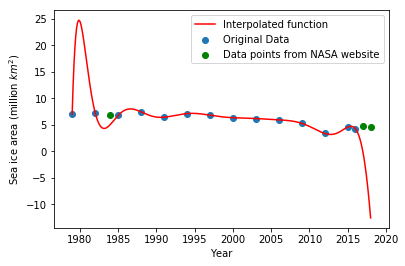

    Coefficients
0     850.102263
1   -1123.276444
2   -2199.944774
3    3032.210505
4    1859.988294
5   -2890.298454
6    -488.084507
7    1175.502867
8     -63.980790
9    -194.921201
10     35.306761
11      8.581727
12     -3.521939
13      6.635692


In [14]:
import pandas as pd

# get coefficients for the polynomial and cubic function
coeff = np.linalg.solve(vander3, ice_areas)

y_poly = []
prediction_values = [1984, 2017, 2018]

# x-values
x = (ice_times-1998)/18

# create the polynomial with coefficients
pc = np.poly1d(coeff)

# actual data from NASA website for the years we need to predict
nasa_times = [1984, 2017, 2018]
nasa_ice = [6.8, 4.8, 4.6]

# create linspace
lin = np.linspace(1979, 2018, 50000)

for i in lin:
    y3 = pc((i-1998)/18)
    y_poly.append(y3)
    

# obtain predicted values for 1984, 2017, 2018
for i in prediction_values:
    y = pc((i-1998)/18)
    print("predicted ice area for t = {} is {}".format(i, y))
    
plt.plot(lin, y_poly, label = 'Interpolated function', c='r')
plt.scatter(ice_times, ice_areas, label = 'Original Data')
plt.scatter(nasa_times, nasa_ice, label = 'Data points from NASA website', c = 'g')
plt.xlabel('Year')
plt.ylabel('Sea ice area (million $km^2$)')
plt.legend()
plt.show()

coeff_table = pd.DataFrame(coeff)
coeff_table.columns = ['Coefficients']
print(coeff_table)




## Exercise 4
How sensitive are the results to small changes in the data? To assess this, add (modest) random perturbations to the $s$ values in the dataset and recompute the interpolating function. Plot the new interpolating function together with the old one, and compare them. Also, use the new function to predict values for $t=1984$, $t=2016$ and $t=2017$, and compare these to the predictions you made before.

 > For a more complete overview we plotted five versions of the perturbated interpolated function.
While the plot still goes through the data points, the output outside the datapoints hugely differs.
The results for the predictions for $t = 1984, t = 2016, t = 2017$ show this. While the $t = 1984$ prediction is inside the data points, as said before the oscillation is still of influence here.

predicted ice area for t = 1984 is 5.021688890998879
predicted ice area for t = 2016 is 4.368095462126206
predicted ice area for t = 2017 is -0.342532632027595
predicted ice area for t = 1984 is 4.989214098794324
predicted ice area for t = 2016 is 4.360498789822474
predicted ice area for t = 2017 is 1.3843511574710163
predicted ice area for t = 1984 is 4.999588244641314
predicted ice area for t = 2016 is 4.3021724994021255
predicted ice area for t = 2017 is 1.7587482881604162
predicted ice area for t = 1984 is 4.875442038391521
predicted ice area for t = 2016 is 4.264557965223116
predicted ice area for t = 2017 is 3.492187920863815
predicted ice area for t = 1984 is 5.6659235655632
predicted ice area for t = 2016 is 4.377344108348189
predicted ice area for t = 2017 is -6.2193411659635744


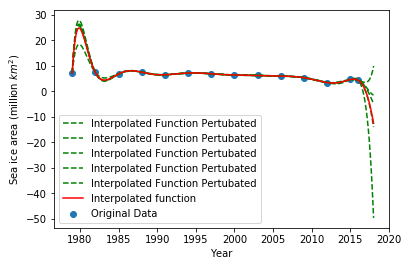

              0
0    106.685928
1   -895.115016
2     -4.212221
3   2379.853224
4   -548.169336
5  -2220.340425
6    734.784656
7    868.910136
8   -356.661438
9   -132.711929
10    65.114581
11     4.062198
12    -4.498954
13     6.675941


In [26]:
import pandas as pd

# x-values
x_p = (ice_times-1998)/18
#create linspace
lin = np.linspace(1979, 2018, 50000)


for i in range(5):
    np.random.seed(i)
    ice_areas_p = np.random.uniform(-0.08, 0.08, len(ice_areas)) + ice_areas
    vander3_p = np.vander((ice_times-1998)/18, 14)

    y_poly_p = []

    #print(ice_areas_p)

    # get coefficients for the polynomial
    coeff_p = np.linalg.solve(vander3_p, ice_areas_p)

    # create the polynomial with coefficients
    pc_p = np.poly1d(coeff_p)

    for i in lin:
        y3_p = pc_p((i-1998)/18)
        y_poly_p.append(y3_p)

    #obtain values for 
    for i in [1984, 2016, 2017]:
        y_p = pc_p((i-1998)/18)
        print("predicted ice area for t = {} is {}".format(i, y_p))
    
    plt.plot(lin, y_poly_p, '--', label = 'Interpolated Function Pertubated', c = 'g')

plt.plot(lin, y_poly, label = 'Interpolated function', c='r')    
plt.scatter(ice_times, ice_areas_p, label = 'Original Data')
plt.xlabel('Year')
plt.ylabel('Sea ice area (million $km^2$)')
plt.legend()
plt.show()

coeff_table_p = pd.DataFrame(coeff_p)
print(coeff_table_p)

## Exercise 5
As an alternative to interpolation, one can use minimization (e.g. linear least squares) to fit a function to the data. Use linear least squares to fit a low-degree (e.g., quadratic or cubic) polynomial to the data in the table. Plot the resulting function together with the data. Make predictions for values at $t=1984$, $t=2017$ and $t=2018$. Compare the results to the results obtained before with interpolation.

Explore the sensitivity of the least squares fit to changes in the data, in the same way as before.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


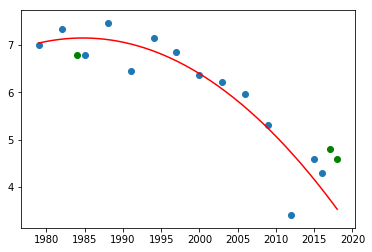

In [12]:

M = ice_times[:, np.newaxis] ** [0,1,2,3]

p, res, rnk, s = np.linalg.lstsq(M, ice_areas)
plt.plot(lin, p[0] + p[1]*lin + p[2]*lin**2 + p[3]*lin**3, 'r')
plt.scatter(ice_times, ice_areas)
plt.scatter(nasa_times, nasa_ice, c = 'g')
plt.show()

## Exercise 6

Fitting a function using linear least squares can be sensitive to "outliers" in the data. As an example, create a single outlier by changing the data point for $t=2009$ from $s=5.31$ to $s=7.31$. Repeat the linear least squares fitting procedure. Discuss your results.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


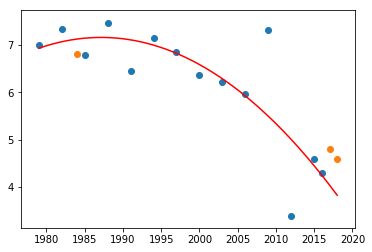

In [13]:

new_a = np.copy(ice_areas)
new_a[10] = 7.31

p, res, rnk, s = np.linalg.lstsq(M, new_a)
plt.plot(lin, p[0] + p[1]*lin + p[2]*lin**2 + p[3]*lin**3, 'r')
plt.scatter(ice_times, new_a)
plt.scatter(nasa_times, nasa_ice)
plt.show()

## Exercise 7
There may be more suitable functions to fit to these data than a polynomial. For example, predictions using a polynomial may give negative values, which would be unphysical. Can you think of a suitable function, and fit it to the data? What predictions does it give? If the function is nonlinear in its parameters, fitting it by least squares will give a _nonlinear least squares_ problem (see section 6.6 in the book by Heath). 

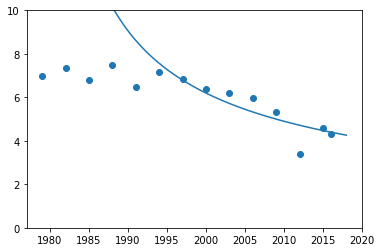

x0 estimate: 43.039951
x1 estimate: -0.627030


In [19]:
# ice_areasi = 1 / ice_areas
# m, c = np.linalg.lstsq(np.vstack([ice_times, np.ones(len(ice_areasi))]).T, ice_areasi)[0]

# plt.plot(lin, 1 / (m * lin + c), 'r')
# plt.scatter(ice_times, ice_areas)
# plt.show()

def fun(x, t, y=0):
    return x[0] * np.power(t-1978, x[1]) - y

res = least_squares(fun, (8, -0.1,), args=(ice_times[5:], ice_areas[5:],))

plt.scatter(ice_times, ice_areas)
plt.plot(lin, fun(res.x, lin))
plt.ylim(0, 10)
plt.show()


print('x0 estimate: %f' % res.x[0])
print('x1 estimate: %f' % res.x[1])